In [1]:
import pandas as pd
import numpy as np
# Charger les données depuis le fichier CSV dans un DataFrame
donnees_colab_add = pd.read_csv('donnees_colab_add.csv')
donnees_colab_dot = pd.read_csv('donnees_colab_dot.csv')
donnees_colab_prod = pd.read_csv('donnees_colab_prod.csv')

In [2]:
donnees_colab_add.head()

,moyenne_add_cpu,moyenne_add_gpu,ecartype_add_cpu,ecartype_add_gpu
0,0.002236,0.002856,0.000908,0.000300
1,0.002234,0.002856,0.000470,0.001591
2,0.004961,0.003781,0.000819,0.001126


In [3]:
donnees_colab_dot.head()

,moyenne_dot_cpu,moyenne_dot_gpu,ecartype_dot_cpu,ecartype_dot_gpu
0,0.001458,0.001925,0.000948,0.000051
1,0.002893,0.001925,0.003024,0.001301
2,0.005007,0.003409,0.003388,0.001823


In [4]:
donnees_colab_prod.head()

,moyenne_prod_cpu,moyenne_prod_gpu,ecartype_prod_cpu,ecartype_prod_gpu
0,0.001122,0.005466,0.001049,0.003314
1,0.002722,0.005466,0.001587,0.004656
2,0.010211,0.009017,0.002388,0.004345


# convertir data (pandas en list) -> environement colab

In [5]:
moyenne_add_cpuc= donnees_colab_add.moyenne_add_cpu.tolist()
moyenne_add_gpuc= donnees_colab_add.moyenne_add_gpu.tolist()

ecartype_add_cpuc = donnees_colab_add.ecartype_add_cpu.tolist()
ecartype_add_gpuc = donnees_colab_add.ecartype_add_gpu.tolist()

In [6]:
moyenne_dot_cpuc= donnees_colab_dot.moyenne_dot_cpu.tolist()
moyenne_dot_gpuc= donnees_colab_dot.moyenne_dot_gpu.tolist()

ecartype_dot_cpuc = donnees_colab_dot.ecartype_dot_cpu.tolist()
ecartype_dot_gpuc = donnees_colab_dot.ecartype_dot_gpu.tolist()

In [7]:
moyenne_prod_cpuc= donnees_colab_prod.moyenne_prod_cpu.tolist()
moyenne_prod_gpuc= donnees_colab_prod.moyenne_prod_gpu.tolist()

ecartype_prod_cpuc = donnees_colab_prod.ecartype_prod_cpu.tolist()
ecartype_prod_gpuc = donnees_colab_prod.ecartype_prod_gpu.tolist()

In [8]:
import numpy as np
dimension_matrice = ['3x3', '5x5', '7x7']
mode_platform=["colab_cpu","colab_gpu"]
x_pos = np.arange(len(dimension_matrice))

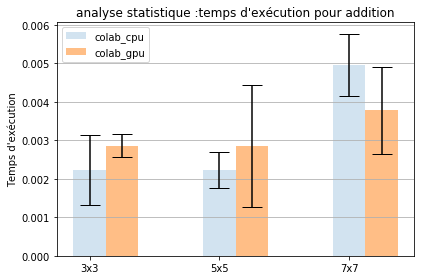

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# Largeur des barres
bar_width = 0.25
indices = range(len(dimension_matrice))

fig, ax = plt.subplots()
ax.bar(dimension_matrice, moyenne_add_cpuc, yerr=ecartype_add_cpuc, width=bar_width,align='center', alpha=0.2, ecolor='black', capsize=10,label=mode_platform[0])
ax.bar([i + bar_width for i in indices], moyenne_add_gpuc, yerr=ecartype_add_gpuc,width=bar_width, align='center', alpha=0.5, ecolor='black', capsize=10,label=mode_platform[1])

ax.set_ylabel("Temps d'exécution")
ax.set_xticks(x_pos)
ax.set_xticklabels(dimension_matrice)
ax.set_title("analyse statistique :temps d'exécution pour addition")
ax.yaxis.grid(True)
ax.legend()
# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_add_bars.png')
plt.show()

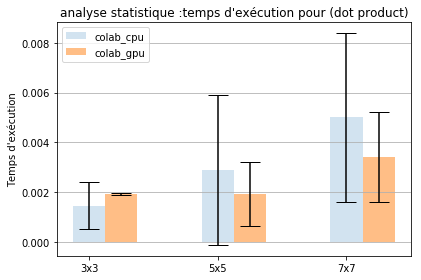

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

# Largeur des barres
bar_width = 0.25
indices = range(len(dimension_matrice))

fig, ax = plt.subplots()
ax.bar(dimension_matrice, moyenne_dot_cpuc, yerr=ecartype_dot_cpuc, width=bar_width,align='center', alpha=0.2, ecolor='black', capsize=10,label=mode_platform[0])
ax.bar([i + bar_width for i in indices], moyenne_dot_gpuc, yerr=ecartype_dot_gpuc,width=bar_width, align='center', alpha=0.5, ecolor='black', capsize=10,label=mode_platform[1])

ax.set_ylabel("Temps d'exécution")
ax.set_xticks(x_pos)
ax.set_xticklabels(dimension_matrice)
ax.set_title("analyse statistique :temps d'exécution pour (dot product)")
ax.yaxis.grid(True)
ax.legend()
# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_dot_bars.png')
plt.show()

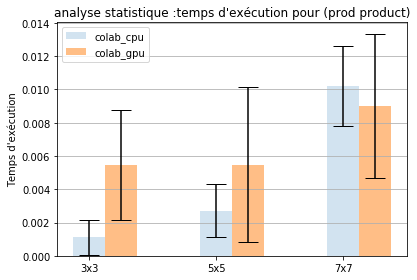

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

# Largeur des barres
bar_width = 0.25
indices = range(len(dimension_matrice))

fig, ax = plt.subplots()
ax.bar(dimension_matrice, moyenne_prod_cpuc, yerr=ecartype_prod_cpuc, width=bar_width,align='center', alpha=0.2, ecolor='black', capsize=10,label=mode_platform[0])
ax.bar([i + bar_width for i in indices], moyenne_prod_gpuc, yerr=ecartype_prod_gpuc,width=bar_width, align='center', alpha=0.5, ecolor='black', capsize=10,label=mode_platform[1])

ax.set_ylabel("Temps d'exécution")
ax.set_xticks(x_pos)
ax.set_xticklabels(dimension_matrice)
ax.set_title("analyse statistique :temps d'exécution pour (prod product)")
ax.yaxis.grid(True)
ax.legend()

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_prod_bars.png')
plt.show()

# ex : (colab vs jetson)

In [12]:
def add_cpu(m1,m2,dim1,dim2,platform):
  platform=platform
  madd=torch.zeros(dim1, dim2,dtype=torch.int)
  for i in range(dim1):
    for j in range(dim2):
      madd[i,j]=m1[i,j]+m2[i,j]
  return madd

In [13]:
def prod_cpu(m1,m2,dim1,dim2,platform):
  platform=platform
  mpod=torch.zeros(dim1, dim2,dtype=torch.int)
  for i in range(0,dim1-1):
    for j in range(0,dim2-1):
      mpod[i,j]=(m1[i,j]*m2[i,j])+(m1[i,j+1]*m2[i+1,j])
  return mpod

In [14]:
def dot_cpu(m1,m2,dim1,dim2,platform):
  platform=platform
  madd=torch.zeros(dim1, dim2,dtype=torch.int)
  for i in range(dim1):
    for j in range(dim2):
      madd[i,j]=m1[i,j]*m2[i,j]
  return madd

# add cpu/gpu

In [15]:
from __future__ import print_function
import torch

**add gpu (3x3)**

In [16]:
import time
import numpy as np
platform="jetson"
"""
m1_3 =  torch.randint(1, 5, (3, 3),device="cuda")
m2_3 =  torch.randint(1, 5, (3, 3),device="cuda")
m1_5 =  torch.randint(1, 5, (5, 5),device="cuda")
m2_5 =  torch.randint(1, 5, (5, 5),device="cuda")
m1_7 =  torch.randint(1, 5, (7, 7),device="cuda")
m2_7 =  torch.randint(1, 5, (7, 7),device="cuda")"""

m1_3 =  torch.randint(1, 5, (3, 3))
m2_3 =  torch.randint(1, 5, (3, 3))
m1_5 =  torch.randint(1, 5, (5, 5))
m2_5 =  torch.randint(1, 5, (5, 5))
m1_7 =  torch.randint(1, 5, (7, 7))
m2_7 =  torch.randint(1, 5, (7, 7))
print("m1_3",m1_3)
print("m2_3",m2_3)
print("---------------------")
print("m1_5",m1_5)
print("m2_5",m2_5)
print("---------------------")
print("m1_7",m1_7)
print("m2_7",m2_7)
add_gpu3=[]
for i in range(5):
  start_time_add_cuda3 = time.time()
  device = "cpu"
  if torch.cuda.is_available():
    device = torch.device("cuda")
    print(add_cpu(m1_3,m2_3,3,3,platform))
  print(device)
  end_time_add_cuda3 = time.time()
  execution_time_add_cuda3 = end_time_add_cuda3 - start_time_add_cuda3
  if i !=0:
    add_gpu3.append(execution_time_add_cuda3)
  print("execution_time_add_cuda dim 3x3 ",execution_time_add_cuda3)

# Imprime les temps d'exécution moyens sur gpu
if len(add_gpu3) > 0:
    moyenne_add_gpu_times3=np.mean(add_gpu3)
    ecart_type_add_gpu_times3 = np.std(add_gpu3)
    print("Temps d'exécution moyen sur gpu 3x3:", moyenne_add_gpu_times3)
    print("Temps d'exécution ecart sur gpu: 3x3", ecart_type_add_gpu_times3)

m1_3 tensor([[1, 1, 4],
        [1, 2, 3],
        [1, 1, 4]])
m2_3 tensor([[1, 1, 1],
        [2, 1, 4],
        [4, 3, 3]])
---------------------
m1_5 tensor([[3, 3, 4, 4, 4],
        [2, 3, 2, 2, 3],
        [4, 2, 4, 1, 2],
        [1, 4, 2, 1, 4],
        [3, 2, 2, 4, 4]])
m2_5 tensor([[4, 1, 3, 3, 4],
        [1, 2, 1, 4, 4],
        [2, 3, 2, 1, 3],
        [1, 4, 3, 3, 4],
        [4, 1, 3, 4, 4]])
---------------------
m1_7 tensor([[3, 4, 1, 3, 1, 1, 2],
        [1, 3, 1, 1, 1, 2, 3],
        [1, 1, 2, 3, 4, 4, 3],
        [1, 2, 1, 3, 4, 4, 2],
        [1, 2, 1, 4, 1, 1, 1],
        [3, 3, 2, 2, 2, 1, 4],
        [2, 1, 3, 2, 1, 2, 4]])
m2_7 tensor([[4, 1, 4, 1, 4, 1, 3],
        [1, 3, 1, 4, 1, 2, 3],
        [2, 4, 1, 1, 2, 2, 2],
        [3, 1, 4, 4, 3, 2, 2],
        [2, 3, 2, 1, 1, 3, 1],
        [3, 2, 2, 1, 4, 4, 1],
        [2, 3, 2, 2, 3, 2, 1]])
tensor([[2, 2, 5],
        [3, 3, 7],
        [5, 4, 7]], dtype=torch.int32)
cuda
execution_time_add_cuda dim 3x3  0.06630

**add gpu (5x5)**

In [17]:
add_gpu5=[]
for i in range(5):
  start_time_add_cuda5 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cuda")
    print(add_cpu(m1_5,m2_5,5,5,platform))
  print(device)
  end_time_add_cuda5 = time.time()
  execution_time_add_cuda5 = end_time_add_cuda5 - start_time_add_cuda5
  if i !=0:
    add_gpu5.append(execution_time_add_cuda5)
  print("execution_time_add_cuda dim 5x5 ",execution_time_add_cuda5)

# Imprime les temps d'exécution moyens sur gpu
if len(add_gpu5) > 0:
    moyenne_add_gpu_times5=np.mean(add_gpu5)
    ecart_type_add_gpu_times5 = np.std(add_gpu5)
    print("Temps d'exécution moyen sur gpu 5x5:", moyenne_add_gpu_times5)
    print("Temps d'exécution ecart sur gpu: 5x5", ecart_type_add_gpu_times5)

tensor([[7, 4, 7, 7, 8],
        [3, 5, 3, 6, 7],
        [6, 5, 6, 2, 5],
        [2, 8, 5, 4, 8],
        [7, 3, 5, 8, 8]], dtype=torch.int32)
cuda
execution_time_add_cuda dim 5x5  0.004192352294921875
tensor([[7, 4, 7, 7, 8],
        [3, 5, 3, 6, 7],
        [6, 5, 6, 2, 5],
        [2, 8, 5, 4, 8],
        [7, 3, 5, 8, 8]], dtype=torch.int32)
cuda
execution_time_add_cuda dim 5x5  0.0044291019439697266
tensor([[7, 4, 7, 7, 8],
        [3, 5, 3, 6, 7],
        [6, 5, 6, 2, 5],
        [2, 8, 5, 4, 8],
        [7, 3, 5, 8, 8]], dtype=torch.int32)
cuda
execution_time_add_cuda dim 5x5  0.003970623016357422
tensor([[7, 4, 7, 7, 8],
        [3, 5, 3, 6, 7],
        [6, 5, 6, 2, 5],
        [2, 8, 5, 4, 8],
        [7, 3, 5, 8, 8]], dtype=torch.int32)
cuda
execution_time_add_cuda dim 5x5  0.004159212112426758
tensor([[7, 4, 7, 7, 8],
        [3, 5, 3, 6, 7],
        [6, 5, 6, 2, 5],
        [2, 8, 5, 4, 8],
        [7, 3, 5, 8, 8]], dtype=torch.int32)
cuda
execution_time_add_cuda dim 5x5  

**add gpu (7x7)**

In [18]:
add_gpu7=[]
for i in range(5):
  start_time_add_cuda7 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cuda")
    print(add_cpu(m1_7,m2_7,7,7,platform))
  print(device)
  end_time_add_cuda7 = time.time()
  execution_time_add_cuda7 = end_time_add_cuda7 - start_time_add_cuda7
  if i !=0:
    add_gpu7.append(execution_time_add_cuda7)
  print("execution_time_add_cuda dim 7x7 ",execution_time_add_cuda7)

# Imprime les temps d'exécution moyens sur gpu
if len(add_gpu7) > 0:
    moyenne_add_gpu_times7=np.mean(add_gpu7)
    ecart_type_add_gpu_times7 = np.std(add_gpu7)
    print("Temps d'exécution moyen sur gpu 7x7:", moyenne_add_gpu_times7)
    print("Temps d'exécution ecart sur gpu: 7x7", ecart_type_add_gpu_times7)

tensor([[7, 5, 5, 4, 5, 2, 5],
        [2, 6, 2, 5, 2, 4, 6],
        [3, 5, 3, 4, 6, 6, 5],
        [4, 3, 5, 7, 7, 6, 4],
        [3, 5, 3, 5, 2, 4, 2],
        [6, 5, 4, 3, 6, 5, 5],
        [4, 4, 5, 4, 4, 4, 5]], dtype=torch.int32)
cuda
execution_time_add_cuda dim 7x7  0.007270336151123047
tensor([[7, 5, 5, 4, 5, 2, 5],
        [2, 6, 2, 5, 2, 4, 6],
        [3, 5, 3, 4, 6, 6, 5],
        [4, 3, 5, 7, 7, 6, 4],
        [3, 5, 3, 5, 2, 4, 2],
        [6, 5, 4, 3, 6, 5, 5],
        [4, 4, 5, 4, 4, 4, 5]], dtype=torch.int32)
cuda
execution_time_add_cuda dim 7x7  0.009911775588989258
tensor([[7, 5, 5, 4, 5, 2, 5],
        [2, 6, 2, 5, 2, 4, 6],
        [3, 5, 3, 4, 6, 6, 5],
        [4, 3, 5, 7, 7, 6, 4],
        [3, 5, 3, 5, 2, 4, 2],
        [6, 5, 4, 3, 6, 5, 5],
        [4, 4, 5, 4, 4, 4, 5]], dtype=torch.int32)
cuda
execution_time_add_cuda dim 7x7  0.0058133602142333984
tensor([[7, 5, 5, 4, 5, 2, 5],
        [2, 6, 2, 5, 2, 4, 6],
        [3, 5, 3, 4, 6, 6, 5],
        [4, 3, 5, 

**add cpu (3x3)**

In [19]:
import time
platform="jetson"
m1_3c =  torch.randint(1, 5, (3, 3))
m2_3c =  torch.randint(1, 5, (3, 3))
m1_5c =  torch.randint(1, 5, (5, 5))
m2_5c =  torch.randint(1, 5, (5, 5))
m1_7c =  torch.randint(1, 5, (7, 7))
m2_7c =  torch.randint(1, 5, (7, 7))

addd_cpu3=[]
for i in range(5):
  start_time_add_cpu3 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cpu")
    #print(add_cpu(m1_3,m2_3,3,3,platform))
    print(add_cpu(m1_3,m2_3,3,3,platform))
  print(device)
  end_time_add_cpu3 = time.time()
  execution_time_add_cpu3 = end_time_add_cpu3 - start_time_add_cpu3
  if i !=0:
    addd_cpu3.append(execution_time_add_cpu3)
  print("execution_time_add_cpu 3x3",execution_time_add_cpu3)

# Imprime les temps d'exécution moyens sur CPU
if len(addd_cpu3) > 0:
    moyenne_add_cpu_times3=np.mean(addd_cpu3)
    ecart_type_add_cpu_times3 = np.std(addd_cpu3)
    print("Temps d'exécution moyen sur CPU 3x3 :", moyenne_add_cpu_times3)
    print("Temps d'exécution ecart sur CPU 3x3 :", ecart_type_add_cpu_times3)

tensor([[2, 2, 5],
        [3, 3, 7],
        [5, 4, 7]], dtype=torch.int32)
cpu
execution_time_add_cpu 3x3 0.002909421920776367
tensor([[2, 2, 5],
        [3, 3, 7],
        [5, 4, 7]], dtype=torch.int32)
cpu
execution_time_add_cpu 3x3 0.0023577213287353516
tensor([[2, 2, 5],
        [3, 3, 7],
        [5, 4, 7]], dtype=torch.int32)
cpu
execution_time_add_cpu 3x3 0.0024416446685791016
tensor([[2, 2, 5],
        [3, 3, 7],
        [5, 4, 7]], dtype=torch.int32)
cpu
execution_time_add_cpu 3x3 0.0026023387908935547
tensor([[2, 2, 5],
        [3, 3, 7],
        [5, 4, 7]], dtype=torch.int32)
cpu
execution_time_add_cpu 3x3 0.002686738967895508
Temps d'exécution moyen sur CPU 3x3 : 0.002522110939025879
Temps d'exécution ecart sur CPU 3x3 : 0.00012945815999376638


**add cpu (5x5)**

In [20]:
addd_cpu5=[]
for i in range(5):
  start_time_add_cpu5 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cpu")
    #print(add_cpu(m1_5c,m2_5c,5,5,platform))
    print(add_cpu(m1_5,m2_5,5,5,platform))
  print(device)
  end_time_add_cpu5 = time.time()
  execution_time_add_cpu5 = end_time_add_cpu5 - start_time_add_cpu5
  if i !=0:
    addd_cpu5.append(execution_time_add_cpu5)
  print("execution_time_add_cpu 5x5",execution_time_add_cpu5)

# Imprime les temps d'exécution moyens sur CPU
if len(addd_cpu5) > 0:
    moyenne_add_cpu_times5=np.mean(addd_cpu5)
    ecart_type_add_cpu_times5 = np.std(addd_cpu5)
    print("Temps d'exécution moyen sur CPU 5x5 :", moyenne_add_cpu_times5)
    print("Temps d'exécution ecart sur CPU 5x5 :", ecart_type_add_cpu_times5)

tensor([[7, 4, 7, 7, 8],
        [3, 5, 3, 6, 7],
        [6, 5, 6, 2, 5],
        [2, 8, 5, 4, 8],
        [7, 3, 5, 8, 8]], dtype=torch.int32)
cpu
execution_time_add_cpu 5x5 0.0044765472412109375
tensor([[7, 4, 7, 7, 8],
        [3, 5, 3, 6, 7],
        [6, 5, 6, 2, 5],
        [2, 8, 5, 4, 8],
        [7, 3, 5, 8, 8]], dtype=torch.int32)
cpu
execution_time_add_cpu 5x5 0.00402069091796875
tensor([[7, 4, 7, 7, 8],
        [3, 5, 3, 6, 7],
        [6, 5, 6, 2, 5],
        [2, 8, 5, 4, 8],
        [7, 3, 5, 8, 8]], dtype=torch.int32)
cpu
execution_time_add_cpu 5x5 0.004666805267333984
tensor([[7, 4, 7, 7, 8],
        [3, 5, 3, 6, 7],
        [6, 5, 6, 2, 5],
        [2, 8, 5, 4, 8],
        [7, 3, 5, 8, 8]], dtype=torch.int32)
cpu
execution_time_add_cpu 5x5 0.0036165714263916016
tensor([[7, 4, 7, 7, 8],
        [3, 5, 3, 6, 7],
        [6, 5, 6, 2, 5],
        [2, 8, 5, 4, 8],
        [7, 3, 5, 8, 8]], dtype=torch.int32)
cpu
execution_time_add_cpu 5x5 0.003635406494140625
Temps d'exécut

**add cpu (7x7)**

In [21]:
addd_cpu7=[]
for i in range(5):
  start_time_add_cpu7 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cpu")
    #print(add_cpu(m1_7c,m2_7c,7,7,platform))
    print(add_cpu(m1_7,m2_7,7,7,platform))
  print(device)
  end_time_add_cpu7 = time.time()
  execution_time_add_cpu7 = end_time_add_cpu7 - start_time_add_cpu7
  if i !=0:
    addd_cpu7.append(execution_time_add_cpu7)
  print("execution_time_add_cpu 7x7",execution_time_add_cpu7)

# Imprime les temps d'exécution moyens sur CPU
if len(addd_cpu7) > 0:
    moyenne_add_cpu_times7=np.mean(addd_cpu7)
    ecart_type_add_cpu_times7 = np.std(addd_cpu7)
    print("Temps d'exécution moyen sur CPU 7x7 :", moyenne_add_cpu_times7)
    print("Temps d'exécution ecart sur CPU 7x7 :", ecart_type_add_cpu_times7)

tensor([[7, 5, 5, 4, 5, 2, 5],
        [2, 6, 2, 5, 2, 4, 6],
        [3, 5, 3, 4, 6, 6, 5],
        [4, 3, 5, 7, 7, 6, 4],
        [3, 5, 3, 5, 2, 4, 2],
        [6, 5, 4, 3, 6, 5, 5],
        [4, 4, 5, 4, 4, 4, 5]], dtype=torch.int32)
cpu
execution_time_add_cpu 7x7 0.008280754089355469
tensor([[7, 5, 5, 4, 5, 2, 5],
        [2, 6, 2, 5, 2, 4, 6],
        [3, 5, 3, 4, 6, 6, 5],
        [4, 3, 5, 7, 7, 6, 4],
        [3, 5, 3, 5, 2, 4, 2],
        [6, 5, 4, 3, 6, 5, 5],
        [4, 4, 5, 4, 4, 4, 5]], dtype=torch.int32)
cpu
execution_time_add_cpu 7x7 0.008485555648803711
tensor([[7, 5, 5, 4, 5, 2, 5],
        [2, 6, 2, 5, 2, 4, 6],
        [3, 5, 3, 4, 6, 6, 5],
        [4, 3, 5, 7, 7, 6, 4],
        [3, 5, 3, 5, 2, 4, 2],
        [6, 5, 4, 3, 6, 5, 5],
        [4, 4, 5, 4, 4, 4, 5]], dtype=torch.int32)
cpu
execution_time_add_cpu 7x7 0.0060918331146240234
tensor([[7, 5, 5, 4, 5, 2, 5],
        [2, 6, 2, 5, 2, 4, 6],
        [3, 5, 3, 4, 6, 6, 5],
        [4, 3, 5, 7, 7, 6, 4],
        

# dot cpu/gpu

**dot cpu (3x3)**

In [22]:
platform="jetson"
dott_cpu3=[]
for i in range(5):
  start_time_dot_cpu3 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cpu")
    print(dot_cpu(m1_3,m2_3,3,3,platform))
  print(device)
  end_time_dot_cpu3 = time.time()
  execution_time_dot_cpu3 = end_time_dot_cpu3 - start_time_dot_cpu3
  if i !=0:
    dott_cpu3.append(execution_time_dot_cpu3)
  print("execution_time_dot_cpu (3x3) : ",execution_time_dot_cpu3)

# Imprime les temps d'exécution moyens sur CPU
if len(dott_cpu3) > 0:
    moyenne_dot_cpu_times3=np.mean(dott_cpu3)
    ecart_type_dot_cpu_times3 = np.std(dott_cpu3)
    print("Temps d'exécution moyen sur CPU (3x3):", moyenne_dot_cpu_times3)
    print("Temps d'exécution ecart sur CPU (3x3):", ecart_type_dot_cpu_times3)

tensor([[ 1,  1,  4],
        [ 2,  2, 12],
        [ 4,  3, 12]], dtype=torch.int32)
cpu
execution_time_dot_cpu (3x3) :  0.0033960342407226562
tensor([[ 1,  1,  4],
        [ 2,  2, 12],
        [ 4,  3, 12]], dtype=torch.int32)
cpu
execution_time_dot_cpu (3x3) :  0.0026903152465820312
tensor([[ 1,  1,  4],
        [ 2,  2, 12],
        [ 4,  3, 12]], dtype=torch.int32)
cpu
execution_time_dot_cpu (3x3) :  0.002897977828979492
tensor([[ 1,  1,  4],
        [ 2,  2, 12],
        [ 4,  3, 12]], dtype=torch.int32)
cpu
execution_time_dot_cpu (3x3) :  0.002980947494506836
tensor([[ 1,  1,  4],
        [ 2,  2, 12],
        [ 4,  3, 12]], dtype=torch.int32)
cpu
execution_time_dot_cpu (3x3) :  0.0021562576293945312
Temps d'exécution moyen sur CPU (3x3): 0.0026813745498657227
Temps d'exécution ecart sur CPU (3x3): 0.00032112639486139475


**dot cpu (5x5)**

In [23]:
dott_cpu5=[]
for i in range(5):
  start_time_dot_cpu5 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cpu")
    print(dot_cpu(m1_5,m2_5,5,5,platform))
  print(device)
  end_time_dot_cpu5 = time.time()
  execution_time_dot_cpu5 = end_time_dot_cpu5 - start_time_dot_cpu5
  if i !=0:
    dott_cpu5.append(execution_time_dot_cpu5)
  print("execution_time_dot_cpu (5x5) : ",execution_time_dot_cpu5)

# Imprime les temps d'exécution moyens sur CPU
if len(dott_cpu5) > 0:
    moyenne_dot_cpu_times5=np.mean(dott_cpu5)
    ecart_type_dot_cpu_times5 = np.std(dott_cpu5)
    print("Temps d'exécution moyen sur CPU (5x5):", moyenne_dot_cpu_times5)
    print("Temps d'exécution ecart sur CPU (5x5):", ecart_type_dot_cpu_times5)

tensor([[12,  3, 12, 12, 16],
        [ 2,  6,  2,  8, 12],
        [ 8,  6,  8,  1,  6],
        [ 1, 16,  6,  3, 16],
        [12,  2,  6, 16, 16]], dtype=torch.int32)
cpu
execution_time_dot_cpu (5x5) :  0.005361795425415039
tensor([[12,  3, 12, 12, 16],
        [ 2,  6,  2,  8, 12],
        [ 8,  6,  8,  1,  6],
        [ 1, 16,  6,  3, 16],
        [12,  2,  6, 16, 16]], dtype=torch.int32)
cpu
execution_time_dot_cpu (5x5) :  0.005045175552368164
tensor([[12,  3, 12, 12, 16],
        [ 2,  6,  2,  8, 12],
        [ 8,  6,  8,  1,  6],
        [ 1, 16,  6,  3, 16],
        [12,  2,  6, 16, 16]], dtype=torch.int32)
cpu
execution_time_dot_cpu (5x5) :  0.0041196346282958984
tensor([[12,  3, 12, 12, 16],
        [ 2,  6,  2,  8, 12],
        [ 8,  6,  8,  1,  6],
        [ 1, 16,  6,  3, 16],
        [12,  2,  6, 16, 16]], dtype=torch.int32)
cpu
execution_time_dot_cpu (5x5) :  0.00412440299987793
tensor([[12,  3, 12, 12, 16],
        [ 2,  6,  2,  8, 12],
        [ 8,  6,  8,  1,  6],
  

**dot cpu (7x7)**

In [24]:
dott_cpu7=[]
for i in range(5):
  start_time_dot_cpu7 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cpu")
    print(dot_cpu(m1_7c,m2_7c,7,7,platform))
  print(device)
  end_time_dot_cpu7 = time.time()
  execution_time_dot_cpu7 = end_time_dot_cpu7 - start_time_dot_cpu7
  if i !=0:
    dott_cpu7.append(execution_time_dot_cpu7)
  print("execution_time_dot_cpu (7x7) : ",execution_time_dot_cpu7)

# Imprime les temps d'exécution moyens sur CPU
if len(dott_cpu7) > 0:
    moyenne_dot_cpu_times7=np.mean(dott_cpu7)
    ecart_type_dot_cpu_times7 = np.std(dott_cpu7)
    print("Temps d'exécution moyen sur CPU (7x7):", moyenne_dot_cpu_times7)
    print("Temps d'exécution ecart sur CPU (7x7):", ecart_type_dot_cpu_times7)

tensor([[ 6,  4,  4,  3,  3,  1,  8],
        [ 8, 12, 16,  8,  2,  4,  6],
        [ 6,  3,  6,  6,  2,  8,  6],
        [ 3,  9,  2,  8,  8,  8,  3],
        [12,  1,  1,  1, 12, 16,  8],
        [ 2,  1,  4,  1,  1, 12,  3],
        [12,  9,  6,  3,  4,  2,  2]], dtype=torch.int32)
cpu
execution_time_dot_cpu (7x7) :  0.009381294250488281
tensor([[ 6,  4,  4,  3,  3,  1,  8],
        [ 8, 12, 16,  8,  2,  4,  6],
        [ 6,  3,  6,  6,  2,  8,  6],
        [ 3,  9,  2,  8,  8,  8,  3],
        [12,  1,  1,  1, 12, 16,  8],
        [ 2,  1,  4,  1,  1, 12,  3],
        [12,  9,  6,  3,  4,  2,  2]], dtype=torch.int32)
cpu
execution_time_dot_cpu (7x7) :  0.006365537643432617
tensor([[ 6,  4,  4,  3,  3,  1,  8],
        [ 8, 12, 16,  8,  2,  4,  6],
        [ 6,  3,  6,  6,  2,  8,  6],
        [ 3,  9,  2,  8,  8,  8,  3],
        [12,  1,  1,  1, 12, 16,  8],
        [ 2,  1,  4,  1,  1, 12,  3],
        [12,  9,  6,  3,  4,  2,  2]], dtype=torch.int32)
cpu
execution_time_dot_cpu (

**dot gpu (3x3)**

In [25]:
platform="jetson"
print("m1_3",m1_3)
print("m2_3",m2_3)
dott_gpu3=[]
for i in range(5):
  start_time_dot_cuda3 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cuda")
    print(dot_cpu(m1_3,m2_3,3,3,platform))
  print(device)
  end_time_dot_cuda3 = time.time()
  execution_time_dot_cuda3 = end_time_dot_cuda3 - start_time_dot_cuda3
  if i !=0:
    dott_gpu3.append(execution_time_dot_cuda3)
  print("execution_time_dot_cuda (3x3):",execution_time_dot_cuda3)

# Imprime les temps d'exécution moyens sur gpu
if len(dott_gpu3) > 0:
    moyenne_dot_gpu_times3=np.mean(dott_gpu3)
    ecart_type_dot_gpu_times3 = np.std(dott_gpu3)
    print("Temps d'exécution moyen sur gpu (3x3):", moyenne_dot_gpu_times3)
    print("Temps d'exécution ecart sur gpu (3x3):", ecart_type_dot_gpu_times3)

m1_3 tensor([[1, 1, 4],
        [1, 2, 3],
        [1, 1, 4]])
m2_3 tensor([[1, 1, 1],
        [2, 1, 4],
        [4, 3, 3]])
tensor([[ 1,  1,  4],
        [ 2,  2, 12],
        [ 4,  3, 12]], dtype=torch.int32)
cuda
execution_time_dot_cuda (3x3): 0.00404047966003418
tensor([[ 1,  1,  4],
        [ 2,  2, 12],
        [ 4,  3, 12]], dtype=torch.int32)
cuda
execution_time_dot_cuda (3x3): 0.0033385753631591797
tensor([[ 1,  1,  4],
        [ 2,  2, 12],
        [ 4,  3, 12]], dtype=torch.int32)
cuda
execution_time_dot_cuda (3x3): 0.004982471466064453
tensor([[ 1,  1,  4],
        [ 2,  2, 12],
        [ 4,  3, 12]], dtype=torch.int32)
cuda
execution_time_dot_cuda (3x3): 0.0028192996978759766
tensor([[ 1,  1,  4],
        [ 2,  2, 12],
        [ 4,  3, 12]], dtype=torch.int32)
cuda
execution_time_dot_cuda (3x3): 0.002450227737426758
Temps d'exécution moyen sur gpu (3x3): 0.003397643566131592
Temps d'exécution ecart sur gpu (3x3): 0.0009678903485722607


**dot gpu (5x5)**

In [26]:
dott_gpu5=[]
for i in range(5):
  start_time_dot_cuda5 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cuda")
    print(dot_cpu(m1_5,m2_5,5,5,platform))
  print(device)
  end_time_dot_cuda5 = time.time()
  execution_time_dot_cuda5 = end_time_dot_cuda5 - start_time_dot_cuda5
  if i !=0:
    dott_gpu5.append(execution_time_dot_cuda5)
  print("execution_time_dot_cuda (5x5):",execution_time_dot_cuda5)

# Imprime les temps d'exécution moyens sur gpu
if len(dott_gpu5) > 0:
    moyenne_dot_gpu_times5=np.mean(dott_gpu5)
    ecart_type_dot_gpu_times5 = np.std(dott_gpu5)
    print("Temps d'exécution moyen sur gpu (5x5):", moyenne_dot_gpu_times5)
    print("Temps d'exécution ecart sur gpu (5x5):", ecart_type_dot_gpu_times5)

tensor([[12,  3, 12, 12, 16],
        [ 2,  6,  2,  8, 12],
        [ 8,  6,  8,  1,  6],
        [ 1, 16,  6,  3, 16],
        [12,  2,  6, 16, 16]], dtype=torch.int32)
cuda
execution_time_dot_cuda (5x5): 0.005917787551879883
tensor([[12,  3, 12, 12, 16],
        [ 2,  6,  2,  8, 12],
        [ 8,  6,  8,  1,  6],
        [ 1, 16,  6,  3, 16],
        [12,  2,  6, 16, 16]], dtype=torch.int32)
cuda
execution_time_dot_cuda (5x5): 0.006251811981201172
tensor([[12,  3, 12, 12, 16],
        [ 2,  6,  2,  8, 12],
        [ 8,  6,  8,  1,  6],
        [ 1, 16,  6,  3, 16],
        [12,  2,  6, 16, 16]], dtype=torch.int32)
cuda
execution_time_dot_cuda (5x5): 0.004179477691650391
tensor([[12,  3, 12, 12, 16],
        [ 2,  6,  2,  8, 12],
        [ 8,  6,  8,  1,  6],
        [ 1, 16,  6,  3, 16],
        [12,  2,  6, 16, 16]], dtype=torch.int32)
cuda
execution_time_dot_cuda (5x5): 0.0036773681640625
tensor([[12,  3, 12, 12, 16],
        [ 2,  6,  2,  8, 12],
        [ 8,  6,  8,  1,  6],
    

**dot gpu (7x7)**

In [27]:
dott_gpu7=[]
for i in range(5):
  start_time_dot_cuda7 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cuda")
    print(dot_cpu(m1_7,m2_7,7,7,platform))
  print(device)
  end_time_dot_cuda7 = time.time()
  execution_time_dot_cuda7 = end_time_dot_cuda7 - start_time_dot_cuda7
  if i !=0:
    dott_gpu7.append(execution_time_dot_cuda7)
  print("execution_time_dot_cuda (7x7):",execution_time_dot_cuda7)

# Imprime les temps d'exécution moyens sur gpu
if len(dott_gpu7) > 0:
    moyenne_dot_gpu_times7=np.mean(dott_gpu7)
    ecart_type_dot_gpu_times7 = np.std(dott_gpu7)
    print("Temps d'exécution moyen sur gpu (7x7):", moyenne_dot_gpu_times7)
    print("Temps d'exécution ecart sur gpu (7x7):", ecart_type_dot_gpu_times7)

tensor([[12,  4,  4,  3,  4,  1,  6],
        [ 1,  9,  1,  4,  1,  4,  9],
        [ 2,  4,  2,  3,  8,  8,  6],
        [ 3,  2,  4, 12, 12,  8,  4],
        [ 2,  6,  2,  4,  1,  3,  1],
        [ 9,  6,  4,  2,  8,  4,  4],
        [ 4,  3,  6,  4,  3,  4,  4]], dtype=torch.int32)
cuda
execution_time_dot_cuda (7x7): 0.008992433547973633
tensor([[12,  4,  4,  3,  4,  1,  6],
        [ 1,  9,  1,  4,  1,  4,  9],
        [ 2,  4,  2,  3,  8,  8,  6],
        [ 3,  2,  4, 12, 12,  8,  4],
        [ 2,  6,  2,  4,  1,  3,  1],
        [ 9,  6,  4,  2,  8,  4,  4],
        [ 4,  3,  6,  4,  3,  4,  4]], dtype=torch.int32)
cuda
execution_time_dot_cuda (7x7): 0.008803606033325195
tensor([[12,  4,  4,  3,  4,  1,  6],
        [ 1,  9,  1,  4,  1,  4,  9],
        [ 2,  4,  2,  3,  8,  8,  6],
        [ 3,  2,  4, 12, 12,  8,  4],
        [ 2,  6,  2,  4,  1,  3,  1],
        [ 9,  6,  4,  2,  8,  4,  4],
        [ 4,  3,  6,  4,  3,  4,  4]], dtype=torch.int32)
cuda
execution_time_dot_cuda

# prod cpu/gpu

**prod gpu (3x3)**

In [28]:
platform="jetson"
prod_gpu3=[]
for i in range(5):
  start_time_prod_cuda3 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cuda")
    print(prod_cpu(m1_3,m2_3,3,3,platform))
  print(device)
  end_time_prod_cuda3 = time.time()
  execution_time_prod_cuda3 = end_time_prod_cuda3 - start_time_prod_cuda3
  if i !=0:
    prod_gpu3.append(execution_time_prod_cuda3)
  print("execution_time_prod_cuda (3x3)",execution_time_prod_cuda3)

# Imprime les temps d'exécution moyens sur gpu
if len(prod_gpu3) > 0:
    moyenne_prod_gpu_times3=np.mean(prod_gpu3)
    print("Temps d'exécution moyen sur gpu:", moyenne_prod_gpu_times3)
    ecart_type_prod_gpu_times3 = np.std(prod_gpu3)
    print("Temps d'exécution ecart sur gpu:", ecart_type_prod_gpu_times3)

tensor([[ 3,  5,  0],
        [10, 11,  0],
        [ 0,  0,  0]], dtype=torch.int32)
cuda
execution_time_prod_cuda (3x3) 0.0036411285400390625
tensor([[ 3,  5,  0],
        [10, 11,  0],
        [ 0,  0,  0]], dtype=torch.int32)
cuda
execution_time_prod_cuda (3x3) 0.002621889114379883
tensor([[ 3,  5,  0],
        [10, 11,  0],
        [ 0,  0,  0]], dtype=torch.int32)
cuda
execution_time_prod_cuda (3x3) 0.00262451171875
tensor([[ 3,  5,  0],
        [10, 11,  0],
        [ 0,  0,  0]], dtype=torch.int32)
cuda
execution_time_prod_cuda (3x3) 0.002002239227294922
tensor([[ 3,  5,  0],
        [10, 11,  0],
        [ 0,  0,  0]], dtype=torch.int32)
cuda
execution_time_prod_cuda (3x3) 0.002358675003051758
Temps d'exécution moyen sur gpu: 0.0024018287658691406
Temps d'exécution ecart sur gpu: 0.00025472941578941384


**prod gpu (5x5)**

In [29]:
prod_gpu5=[]
for i in range(5):
  start_time_prod_cuda5 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cuda")
    print(prod_cpu(m1_5,m2_5,5,5,platform))
  print(device)
  end_time_prod_cuda5 = time.time()
  execution_time_prod_cuda5 = end_time_prod_cuda5 - start_time_prod_cuda5
  if i !=0:
    prod_gpu5.append(execution_time_prod_cuda5)
  print("execution_time_prod_cuda (5x5)",execution_time_prod_cuda5)

# Imprime les temps d'exécution moyens sur gpu
if len(prod_gpu5) > 0:
    moyenne_prod_gpu_times5=np.mean(prod_gpu5)
    print("Temps d'exécution moyen sur gpu (5x5):", moyenne_prod_gpu_times5)
    ecart_type_prod_gpu_times5 = np.std(prod_gpu5)
    print("Temps d'exécution ecart sur gpu (5x5):", ecart_type_prod_gpu_times5)

tensor([[15, 11, 16, 28,  0],
        [ 8, 12,  6, 11,  0],
        [10, 22, 11,  7,  0],
        [17, 18,  9, 19,  0],
        [ 0,  0,  0,  0,  0]], dtype=torch.int32)
cuda
execution_time_prod_cuda (5x5) 0.007015705108642578
tensor([[15, 11, 16, 28,  0],
        [ 8, 12,  6, 11,  0],
        [10, 22, 11,  7,  0],
        [17, 18,  9, 19,  0],
        [ 0,  0,  0,  0,  0]], dtype=torch.int32)
cuda
execution_time_prod_cuda (5x5) 0.004277944564819336
tensor([[15, 11, 16, 28,  0],
        [ 8, 12,  6, 11,  0],
        [10, 22, 11,  7,  0],
        [17, 18,  9, 19,  0],
        [ 0,  0,  0,  0,  0]], dtype=torch.int32)
cuda
execution_time_prod_cuda (5x5) 0.0065250396728515625
tensor([[15, 11, 16, 28,  0],
        [ 8, 12,  6, 11,  0],
        [10, 22, 11,  7,  0],
        [17, 18,  9, 19,  0],
        [ 0,  0,  0,  0,  0]], dtype=torch.int32)
cuda
execution_time_prod_cuda (5x5) 0.006576061248779297
tensor([[15, 11, 16, 28,  0],
        [ 8, 12,  6, 11,  0],
        [10, 22, 11,  7,  0],
 

**prod gpu (7x7)**

In [30]:
prod_gpu7=[]
for i in range(5):
  start_time_prod_cuda7 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cuda")
    print(prod_cpu(m1_7,m2_7,7,7,platform))
  print(device)
  end_time_prod_cuda7 = time.time()
  execution_time_prod_cuda7 = end_time_prod_cuda7 - start_time_prod_cuda7
  if i !=0:
    prod_gpu7.append(execution_time_prod_cuda7)
  print("execution_time_prod_cuda (7x7)",execution_time_prod_cuda7)

# Imprime les temps d'exécution moyens sur gpu
if len(prod_gpu7) > 0:
    moyenne_prod_gpu_times7=np.mean(prod_gpu7)
    print("Temps d'exécution moyen sur gpu (7x7):", moyenne_prod_gpu_times7)
    ecart_type_prod_gpu_times7 = np.std(prod_gpu7)
    print("Temps d'exécution ecart sur gpu (7x7):", ecart_type_prod_gpu_times7)

tensor([[16,  7,  7,  7,  5,  5,  0],
        [ 7, 13,  2,  5,  5, 10,  0],
        [ 5,  6, 14, 19, 20, 14,  0],
        [ 7,  5, 10, 16, 16, 14,  0],
        [ 8,  8, 10,  5,  5,  7,  0],
        [15, 12,  8,  6, 11, 12,  0],
        [ 0,  0,  0,  0,  0,  0,  0]], dtype=torch.int32)
cuda
execution_time_prod_cuda (7x7) 0.010145187377929688
tensor([[16,  7,  7,  7,  5,  5,  0],
        [ 7, 13,  2,  5,  5, 10,  0],
        [ 5,  6, 14, 19, 20, 14,  0],
        [ 7,  5, 10, 16, 16, 14,  0],
        [ 8,  8, 10,  5,  5,  7,  0],
        [15, 12,  8,  6, 11, 12,  0],
        [ 0,  0,  0,  0,  0,  0,  0]], dtype=torch.int32)
cuda
execution_time_prod_cuda (7x7) 0.008875131607055664
tensor([[16,  7,  7,  7,  5,  5,  0],
        [ 7, 13,  2,  5,  5, 10,  0],
        [ 5,  6, 14, 19, 20, 14,  0],
        [ 7,  5, 10, 16, 16, 14,  0],
        [ 8,  8, 10,  5,  5,  7,  0],
        [15, 12,  8,  6, 11, 12,  0],
        [ 0,  0,  0,  0,  0,  0,  0]], dtype=torch.int32)
cuda
execution_time_prod_cud

**prod gpu (11x11)**

In [31]:
"""prod_gpu11=[]
for i in range(5):
  start_time_prod_cuda11 = time.time()
  print(prod_cpu(m1_11,m2_11,11,11,platform))
  end_time_prod_cuda11 = time.time()
  execution_time_prod_cuda11 = end_time_prod_cuda11 - start_time_prod_cuda11
  if i !=0:
    prod_gpu11.append(execution_time_prod_cuda11)
  print("execution_time_prod_cuda (11x11)",execution_time_prod_cuda11)

# Imprime les temps d'exécution moyens sur gpu
if len(prod_gpu11) > 0:
    moyenne_prod_gpu_times11=sum(prod_gpu11) / len(prod_gpu11)
    print("Temps d'exécution moyen sur gpu (11x11):", moyenne_prod_gpu_times11)
    ecart_type_prod_gpu_times11 = np.std(prod_gpu11)
    print("Temps d'exécution ecart sur gpu (11x11):", ecart_type_prod_gpu_times11)"""

'prod_gpu11=[]\nfor i in range(5):\n  start_time_prod_cuda11 = time.time()\n  print(prod_cpu(m1_11,m2_11,11,11,platform))\n  end_time_prod_cuda11 = time.time()\n  execution_time_prod_cuda11 = end_time_prod_cuda11 - start_time_prod_cuda11\n  if i !=0:\n    prod_gpu11.append(execution_time_prod_cuda11)\n  print("execution_time_prod_cuda (11x11)",execution_time_prod_cuda11)\n\n# Imprime les temps d\'exécution moyens sur gpu\nif len(prod_gpu11) > 0:\n    moyenne_prod_gpu_times11=sum(prod_gpu11) / len(prod_gpu11)\n    print("Temps d\'exécution moyen sur gpu (11x11):", moyenne_prod_gpu_times11)\n    ecart_type_prod_gpu_times11 = np.std(prod_gpu11)\n    print("Temps d\'exécution ecart sur gpu (11x11):", ecart_type_prod_gpu_times11)'

**prod cpu (3x3)**

In [32]:
prodd_cpu3=[]
for i in range(5):
  start_time_prod_cpu3 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cpu")
    print(prod_cpu(m1_3,m2_3,3,3,platform))
  print(device)
  end_time_prod_cpu3 = time.time()
  execution_time_prod_cpu3 = end_time_prod_cpu3 - start_time_prod_cpu3
  if i !=0:
    prodd_cpu3.append(execution_time_prod_cpu3)
  print("execution_time_prod_cpu3 (3x3)",execution_time_prod_cpu3)

# Imprime les temps d'exécution moyens sur cpu
if len(prodd_cpu3) > 0:
    moyenne_prod_cpu_times3=np.mean(prodd_cpu3)
    print("Temps d'exécution moyen sur cpu (3x3):", moyenne_prod_cpu_times3)
    ecart_type_prod_cpu_times3 = np.std(prodd_cpu3)
    print("Temps d'exécution ecart sur cpu (3x3):", ecart_type_prod_cpu_times3)

tensor([[ 3,  5,  0],
        [10, 11,  0],
        [ 0,  0,  0]], dtype=torch.int32)
cpu
execution_time_prod_cpu3 (3x3) 0.004241943359375
tensor([[ 3,  5,  0],
        [10, 11,  0],
        [ 0,  0,  0]], dtype=torch.int32)
cpu
execution_time_prod_cpu3 (3x3) 0.0029897689819335938
tensor([[ 3,  5,  0],
        [10, 11,  0],
        [ 0,  0,  0]], dtype=torch.int32)
cpu
execution_time_prod_cpu3 (3x3) 0.003031015396118164
tensor([[ 3,  5,  0],
        [10, 11,  0],
        [ 0,  0,  0]], dtype=torch.int32)
cpu
execution_time_prod_cpu3 (3x3) 0.0024220943450927734
tensor([[ 3,  5,  0],
        [10, 11,  0],
        [ 0,  0,  0]], dtype=torch.int32)
cpu
execution_time_prod_cpu3 (3x3) 0.002152681350708008
Temps d'exécution moyen sur cpu (3x3): 0.0026488900184631348
Temps d'exécution ecart sur cpu (3x3): 0.0003741248425992074


**prod cpu (5x5)**

In [33]:
prodd_cpu5=[]
for i in range(5):
  start_time_prod_cpu5 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cpu")
    print(prod_cpu(m1_5,m2_5,5,5,platform))
  print(device)
  end_time_prod_cpu5 = time.time()
  execution_time_prod_cpu5 = end_time_prod_cpu5 - start_time_prod_cpu5
  if i !=0:
    prodd_cpu5.append(execution_time_prod_cpu5)
  print("execution_time_prod_cpu (5x5)",execution_time_prod_cpu5)

# Imprime les temps d'exécution moyens sur cpu
if len(prodd_cpu5) > 0:
    moyenne_prod_cpu_times5=np.mean(prodd_cpu5)
    print("Temps d'exécution moyen sur cpu (5x5):", moyenne_prod_cpu_times5)
    ecart_type_prod_cpu_times5 = np.std(prodd_cpu5)
    print("Temps d'exécution ecart sur cpu (5x5):", ecart_type_prod_cpu_times5)

tensor([[15, 11, 16, 28,  0],
        [ 8, 12,  6, 11,  0],
        [10, 22, 11,  7,  0],
        [17, 18,  9, 19,  0],
        [ 0,  0,  0,  0,  0]], dtype=torch.int32)
cpu
execution_time_prod_cpu (5x5) 0.006667613983154297
tensor([[15, 11, 16, 28,  0],
        [ 8, 12,  6, 11,  0],
        [10, 22, 11,  7,  0],
        [17, 18,  9, 19,  0],
        [ 0,  0,  0,  0,  0]], dtype=torch.int32)
cpu
execution_time_prod_cpu (5x5) 0.0071866512298583984
tensor([[15, 11, 16, 28,  0],
        [ 8, 12,  6, 11,  0],
        [10, 22, 11,  7,  0],
        [17, 18,  9, 19,  0],
        [ 0,  0,  0,  0,  0]], dtype=torch.int32)
cpu
execution_time_prod_cpu (5x5) 0.0043370723724365234
tensor([[15, 11, 16, 28,  0],
        [ 8, 12,  6, 11,  0],
        [10, 22, 11,  7,  0],
        [17, 18,  9, 19,  0],
        [ 0,  0,  0,  0,  0]], dtype=torch.int32)
cpu
execution_time_prod_cpu (5x5) 0.004070758819580078
tensor([[15, 11, 16, 28,  0],
        [ 8, 12,  6, 11,  0],
        [10, 22, 11,  7,  0],
        

**prod cpu (7x7)**

In [34]:
prodd_cpu7=[]
for i in range(5):
  start_time_prod_cpu7 = time.time()
  if torch.cuda.is_available():
    device = torch.device("cpu")
    print(prod_cpu(m1_7,m2_7,7,7,platform))
  print(device)
  end_time_prod_cpu7 = time.time()
  execution_time_prod_cpu7 = end_time_prod_cpu7 - start_time_prod_cpu7
  if i !=0:
    prodd_cpu7.append(execution_time_prod_cpu7)
  print("execution_time_prod_cpu7 (7x7)",execution_time_prod_cpu7)

# Imprime les temps d'exécution moyens sur cpu
if len(prodd_cpu7) > 0:
    moyenne_prod_cpu_times7=np.mean(prodd_cpu7)
    print("Temps d'exécution moyen sur cpu (7x7):", moyenne_prod_cpu_times7)
    ecart_type_prod_cpu_times7 = np.std(prodd_cpu7)
    print("Temps d'exécution ecart sur cpu (7x7):", ecart_type_prod_cpu_times7)

tensor([[16,  7,  7,  7,  5,  5,  0],
        [ 7, 13,  2,  5,  5, 10,  0],
        [ 5,  6, 14, 19, 20, 14,  0],
        [ 7,  5, 10, 16, 16, 14,  0],
        [ 8,  8, 10,  5,  5,  7,  0],
        [15, 12,  8,  6, 11, 12,  0],
        [ 0,  0,  0,  0,  0,  0,  0]], dtype=torch.int32)
cpu
execution_time_prod_cpu7 (7x7) 0.010678529739379883
tensor([[16,  7,  7,  7,  5,  5,  0],
        [ 7, 13,  2,  5,  5, 10,  0],
        [ 5,  6, 14, 19, 20, 14,  0],
        [ 7,  5, 10, 16, 16, 14,  0],
        [ 8,  8, 10,  5,  5,  7,  0],
        [15, 12,  8,  6, 11, 12,  0],
        [ 0,  0,  0,  0,  0,  0,  0]], dtype=torch.int32)
cpu
execution_time_prod_cpu7 (7x7) 0.010944604873657227
tensor([[16,  7,  7,  7,  5,  5,  0],
        [ 7, 13,  2,  5,  5, 10,  0],
        [ 5,  6, 14, 19, 20, 14,  0],
        [ 7,  5, 10, 16, 16, 14,  0],
        [ 8,  8, 10,  5,  5,  7,  0],
        [15, 12,  8,  6, 11, 12,  0],
        [ 0,  0,  0,  0,  0,  0,  0]], dtype=torch.int32)
cpu
execution_time_prod_cpu7 (

**prod cpu (11x11)**

In [35]:
"""prodd_cpu11=[]
for i in range(5):
  start_time_prod_cpu11 = time.time()
  print(prod_cpu(m1_11c,m2_11c,11,11,platform))
  end_time_prod_cpu11 = time.time()
  execution_time_prod_cpu11 = end_time_prod_cpu11 - start_time_prod_cpu11
  if i !=0:
    prodd_cpu11.append(execution_time_prod_cpu11)
  print("execution_time_prod_cpu11 (11x11)",execution_time_prod_cpu11)

# Imprime les temps d'exécution moyens sur cpu
if len(prodd_cpu11) > 0:
    moyenne_prod_cpu_times11=sum(prodd_cpu11) / len(prodd_cpu11)
    print("Temps d'exécution moyen sur cpu (11x11):", moyenne_prod_cpu_times11)
    ecart_type_prod_cpu_times11 = np.std(prodd_cpu11)
    print("Temps d'exécution ecart sur cpu (11x11):", ecart_type_prod_cpu_times11)"""

'prodd_cpu11=[]\nfor i in range(5):\n  start_time_prod_cpu11 = time.time()\n  print(prod_cpu(m1_11c,m2_11c,11,11,platform))\n  end_time_prod_cpu11 = time.time()\n  execution_time_prod_cpu11 = end_time_prod_cpu11 - start_time_prod_cpu11\n  if i !=0:\n    prodd_cpu11.append(execution_time_prod_cpu11)\n  print("execution_time_prod_cpu11 (11x11)",execution_time_prod_cpu11)\n\n# Imprime les temps d\'exécution moyens sur cpu\nif len(prodd_cpu11) > 0:\n    moyenne_prod_cpu_times11=sum(prodd_cpu11) / len(prodd_cpu11)\n    print("Temps d\'exécution moyen sur cpu (11x11):", moyenne_prod_cpu_times11)\n    ecart_type_prod_cpu_times11 = np.std(prodd_cpu11)\n    print("Temps d\'exécution ecart sur cpu (11x11):", ecart_type_prod_cpu_times11)'

## operation add (data viz)

In [36]:
dimension_matrice = ['3x3', '5x5', '7x7']
mode_platform=["colab_cpu","colab_gpu","jetson_cpu","jetson_gpu"]
x_pos = np.arange(len(dimension_matrice))
moyenne_add_cpuj= [moyenne_add_cpu_times3, moyenne_add_cpu_times5,moyenne_add_cpu_times7]
moyenne_add_gpuj= [moyenne_add_gpu_times5,moyenne_add_gpu_times5, moyenne_add_gpu_times7]

ecartype_add_cpuj = [ecart_type_add_cpu_times3, ecart_type_add_cpu_times5,ecart_type_add_cpu_times7]
ecartype_add_gpuj = [ecart_type_add_gpu_times3,ecart_type_add_gpu_times5, ecart_type_add_gpu_times7]

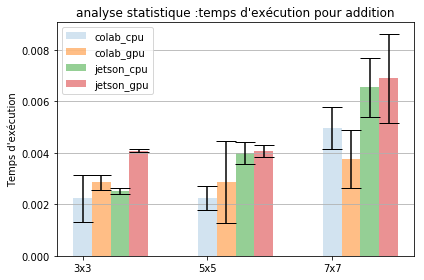

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

# Largeur des barres
bar_width = 0.15
indices = range(len(dimension_matrice))

fig, ax = plt.subplots()
ax.bar(dimension_matrice, moyenne_add_cpuc, yerr=ecartype_add_cpuc, width=bar_width,align='center', alpha=0.2, ecolor='black', capsize=10,label=mode_platform[0])
ax.bar([i + bar_width for i in indices], moyenne_add_gpuc, yerr=ecartype_add_gpuc,width=bar_width, align='center', alpha=0.5, ecolor='black', capsize=10,label=mode_platform[1])

ax.bar([i + 2 * bar_width for i in indices], moyenne_add_cpuj, yerr=ecartype_add_cpuj,width=bar_width, align='center', alpha=0.5, ecolor='black', capsize=10,label=mode_platform[2])
ax.bar([i + 3 * bar_width for i in indices], moyenne_add_gpuj, yerr=ecartype_add_gpuj,width=bar_width, align='center', alpha=0.5, ecolor='black', capsize=10,label=mode_platform[3])

ax.set_ylabel("Temps d'exécution")
ax.set_xticks(x_pos)
ax.set_xticklabels(dimension_matrice)
ax.set_title("analyse statistique :temps d'exécution pour addition")
ax.yaxis.grid(True)
ax.legend()
# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_add_bars.png')
plt.show()

## operation dot (data viz)

In [38]:
from numpy.ma.core import dot
moyenne_dot_cpuj= [moyenne_dot_cpu_times3, moyenne_dot_cpu_times5,moyenne_dot_cpu_times7]
moyenne_dot_gpuj= [moyenne_dot_gpu_times5,moyenne_dot_gpu_times5, moyenne_dot_gpu_times7]

ecartype_dot_cpuj = [ecart_type_dot_cpu_times3, ecart_type_dot_cpu_times5,ecart_type_dot_cpu_times7]
ecartype_dot_gpuj = [ecart_type_dot_gpu_times3,ecart_type_dot_gpu_times5, ecart_type_dot_gpu_times7]

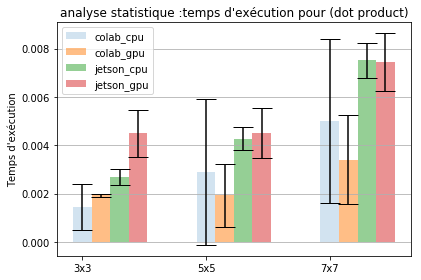

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

# Largeur des barres
bar_width = 0.15
indices = range(len(dimension_matrice))

fig, ax = plt.subplots()
ax.bar(dimension_matrice, moyenne_dot_cpuc, yerr=ecartype_dot_cpuc, width=bar_width,align='center', alpha=0.2, ecolor='black', capsize=10,label=mode_platform[0])
ax.bar([i + bar_width for i in indices], moyenne_dot_gpuc, yerr=ecartype_dot_gpuc,width=bar_width, align='center', alpha=0.5, ecolor='black', capsize=10,label=mode_platform[1])

ax.bar([i + 2 * bar_width for i in indices], moyenne_dot_cpuj, yerr=ecartype_dot_cpuj,width=bar_width, align='center', alpha=0.5, ecolor='black', capsize=10,label=mode_platform[2])
ax.bar([i + 3 * bar_width for i in indices], moyenne_dot_gpuj, yerr=ecartype_dot_gpuj,width=bar_width, align='center', alpha=0.5, ecolor='black', capsize=10,label=mode_platform[3])

ax.set_ylabel("Temps d'exécution")
ax.set_xticks(x_pos)
ax.set_xticklabels(dimension_matrice)
ax.set_title("analyse statistique :temps d'exécution pour (dot product)")
ax.yaxis.grid(True)
ax.legend()
# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_dot_bars.png')
plt.show()

## operation prod (data viz)

In [40]:
moyenne_prod_cpuj= [moyenne_prod_cpu_times3, moyenne_prod_cpu_times5,moyenne_prod_cpu_times7]
moyenne_prod_gpuj= [moyenne_prod_gpu_times5,moyenne_prod_gpu_times5, moyenne_prod_gpu_times7]

ecartype_prod_cpuj = [ecart_type_prod_cpu_times3, ecart_type_prod_cpu_times5,ecart_type_prod_cpu_times7]
ecartype_prod_gpuj = [ecart_type_prod_gpu_times3,ecart_type_prod_gpu_times5, ecart_type_prod_gpu_times7]

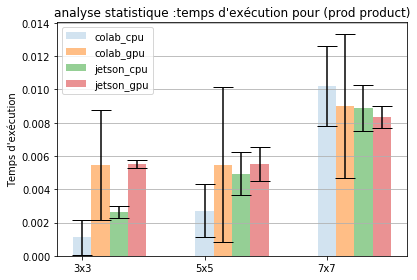

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

# Largeur des barres
bar_width = 0.15
indices = range(len(dimension_matrice))

fig, ax = plt.subplots()
ax.bar(dimension_matrice, moyenne_prod_cpuc, yerr=ecartype_prod_cpuc, width=bar_width,align='center', alpha=0.2, ecolor='black', capsize=10,label=mode_platform[0])
ax.bar([i + bar_width for i in indices], moyenne_prod_gpuc, yerr=ecartype_prod_gpuc,width=bar_width, align='center', alpha=0.5, ecolor='black', capsize=10,label=mode_platform[1])

ax.bar([i + 2 * bar_width for i in indices], moyenne_prod_cpuj, yerr=ecartype_prod_cpuj,width=bar_width, align='center', alpha=0.5, ecolor='black', capsize=10,label=mode_platform[2])
ax.bar([i + 3 * bar_width for i in indices], moyenne_prod_gpuj, yerr=ecartype_prod_gpuj,width=bar_width, align='center', alpha=0.5, ecolor='black', capsize=10,label=mode_platform[3])

ax.set_ylabel("Temps d'exécution")
ax.set_xticks(x_pos)
ax.set_xticklabels(dimension_matrice)
ax.set_title("analyse statistique :temps d'exécution pour (prod product)")
ax.yaxis.grid(True)
ax.legend()
# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_prod_bars.png')
plt.show()